<h1 style='color: blue; font-size: 36px; font-weight: bold;'>Análise de Vendas de Bebidas</h1>

# Objetivo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nosso objetivo é criar dois dashboards com o Power BI para analisar as vendas de uma loja fictícia de bebidas chamada Dr.Drink.

# Obtenção dos dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A base de dados com a qual iremos trabalhar foi criada por mim de maneira aleatória utilizando o Excel, portanto não são dados reais, servem apenas para estudo e prática. Os dados ficarão disponíveis para download dentro do repositório no GitHub.

# Apresentação dos dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A base de dados está separada em 4 tabelas, sendo elas:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li><b>Itens_Notas_Fiscais</b>: Possui o ID da nota, o ID do produto e as quantidades</li>
<li><b>Notas_Fiscais</b>: Possui o ID da nota, a data da compra, o ID da loja e o imposto</li>
<li><b>Produto</b>: Possui o ID, nome, sabor, embalagem, volume, preço e custo de cada produto</li>
<li><b>Loja</b>: Possui o ID da loja, a cidade, o Estado e a região</li>

# Tratamento dos dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como essa base de dados foi criada de maneira bem simples e aleatória apenas para finalidade de estudo e prática, ela não possui valores faltantes, ou dados com tipos alterados, portanto o processo de tratamento dos dados não foi necessário neste caso.

# Construção do Dashboard

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Neste estudo nós teremos dois dashboards, o primeiro com um panorama geral da receita total da loja e o segundo contendo uma análise mais aprofundada do lucro da loja, com análises de cenários envolvendo mudanças de preços e das quantidades vendidas, e uma análise de Pareto a fim de verificar qual o impacto dos produtos no lucro.

## Tabela Calendário

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para facilitar a manipulação das datas, criaremos uma tabela de calendário com a função DAX CALENDARAUTO().

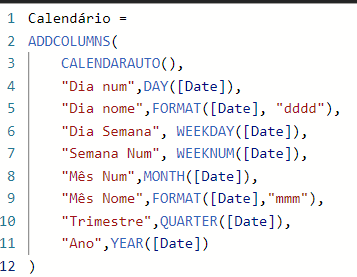

## Relações entre as tabelas

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Agora analisaremos a relação entre as tabelas. A tabela NotasFiscais possui uma cardinalidade de 1 para muitos com a tabela ItensNotasFiscais por meio do campo ID_Nota, uma cardinalidade de muitos para 1 com a tabela Lojas por meio do campo ID_Loja, e uma cardinalidade de muitos para 1 com a tabela Calendário por meio do campo Data_da_Compra.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A tabela Produtos possui uma cardinalidade de 1 para muitos com a tabela ItensNotasFiscais por meio do campo ID_Produto.

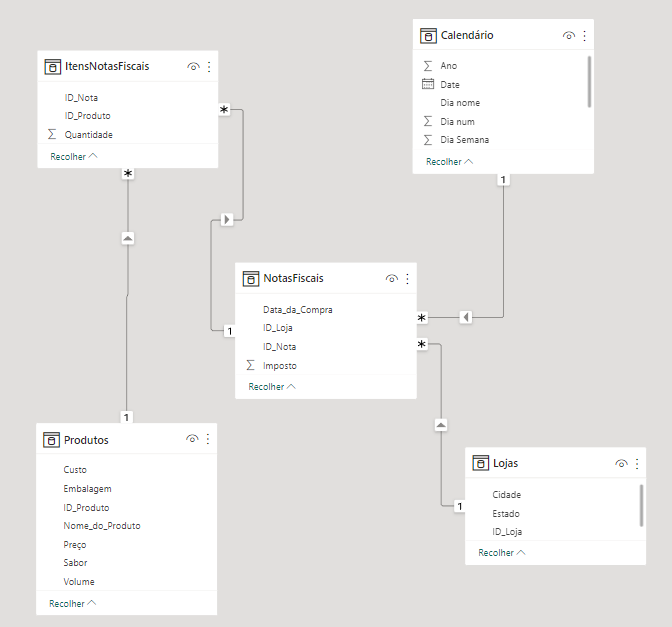

## Medidas

### Primeiro Dashboard

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para o primeiro dashboard calcularemos a receita líquida total, o custo total dos produtos, o lucro líquido total, o imposto total e a quantidade total vendida.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A receita líquida total será a soma de cada linha da multiplicação da quantidade pelo preço.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O Custo total será calculado de forma análoga à receita porém substituindo o preço pelo custo do produto.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A Quantidade total será calculada de forma bem simples apenas pela soma da coluna com as quantidades.

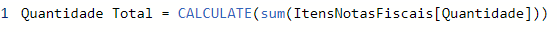

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para o lucro teremos a subtração entre a receita líquida e o custo. E para o cálculo do imposto teremos a subtração entre a receita bruta (quantidade * preço * imposto) e a receita líquida.

### Segundo Dashboard

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para o segundo dashboard o primeira passo é criar dois parâmetros. Ambos serão parâmetros de intervalos numéricos variando de -1 a 1 com passo de 0.05 (5%) para aumento ou diminuição tanto dos preços quanto das quantidades.

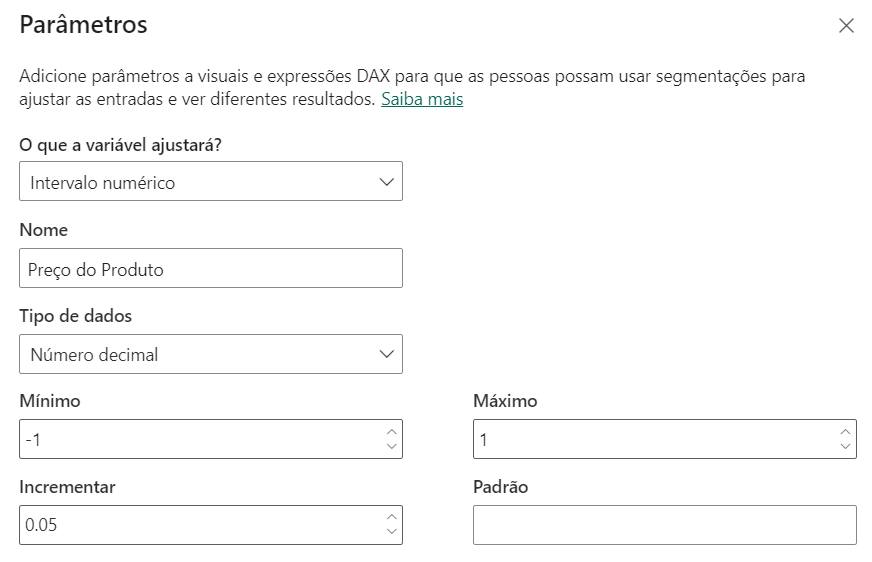

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Após a criação dos parâmetros nós criaremos novas medidas para receita, custo e lucro, porém onde antes tinhamos as quantidades e os preços nas fórmulas, agora teremos os parâmetros criados.

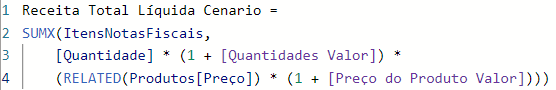

### Análise de Pareto

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O entendimento da Análise de Pareto é simples: 80% das consequências originam-se de 20% das causas.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Ocorre a seguinte separação para entender a origem dos 80% dos problemas e dos 20% sobre a origem dentro dos fatores:
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Classe A – a maior importância, valor ou quantidade da análise, o que corresponde a 20% do total (produtos com maior faturamento);
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>   
Classe B – importância, valor ou quantidade intermediária, o que corresponder a 30% do total (produtos com médio faturamento);
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
Classe C – de menor importância, valor ou quantidade, o que corresponde a 50% do total (produtos com baixo faturamento)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Então vamos agrupar nossos produtos dentro dessas classes para visualizar quais possuem mais ou menos importância para o lucro.

<p style='font-size: 18px; line-height: 2; text-align: justify;'> 
Dessa forma, na primeira linha, visualizaremos apenas o primeiro valor, na segunda, os dois valores acima, na terceira, os três valores acima e assim por diante. Desta maneira, o acumulado é apresentado de forma inteligente. Em seguida, vamos calcular o percentual acumulado pela divisão entre o ranking acumulado e o lucro total.

<p style='font-size: 18px; line-height: 2; text-align: justify;'> 
Agora criaremos a medida de nossa análise. Vamos definir dois intervalos, por exemplo, 60% e 80%. Esses intervalos são limitadores, ou seja, o percentual do lucro acumulado é somado até atingir esses valores, e isso mostrará quantos e quais produtos representam 60% e 80% do lucro total respectivamente. Utilizaremos a função SWITCH(), verificaremos os valores verdadeiros e os classificaremos de acordo com as classes.

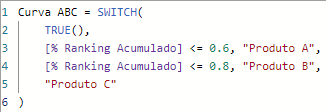

<p style='font-size: 18px; line-height: 2; text-align: justify;'> 
Para auxiliar o visual, criaremos duas medidas de valores únicos, uma para 60% e outra para 80%.

### Top Produtos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
Ao final vamos criar uma medida para visualizar um ranking categorizado dos produtos. Usaremos duas variáveis que serão os valores máximos e mínimos de uma tabela criada com as categorias do ranking. E o retorno será o cálculo do lucro filtrando os produtos por essas categorias.

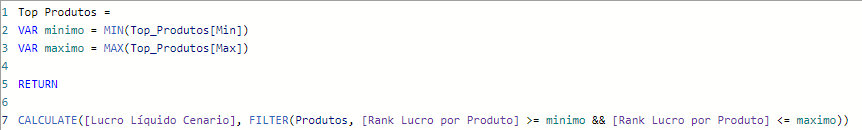 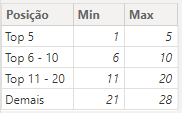

## Dashboards

<p style='font-size: 18px; line-height: 2; text-align: justify;'> 
Após definirmos as medidas e parâmetros, podemos criar nosso dashboard. Toda a edição dos painéis foi realizada com o PowerPoint, o nome da loja é fictício e os ícones foram obtidos do site https://www.flaticon.com/br/. Ao final teremos dois dashboards como abaixo.

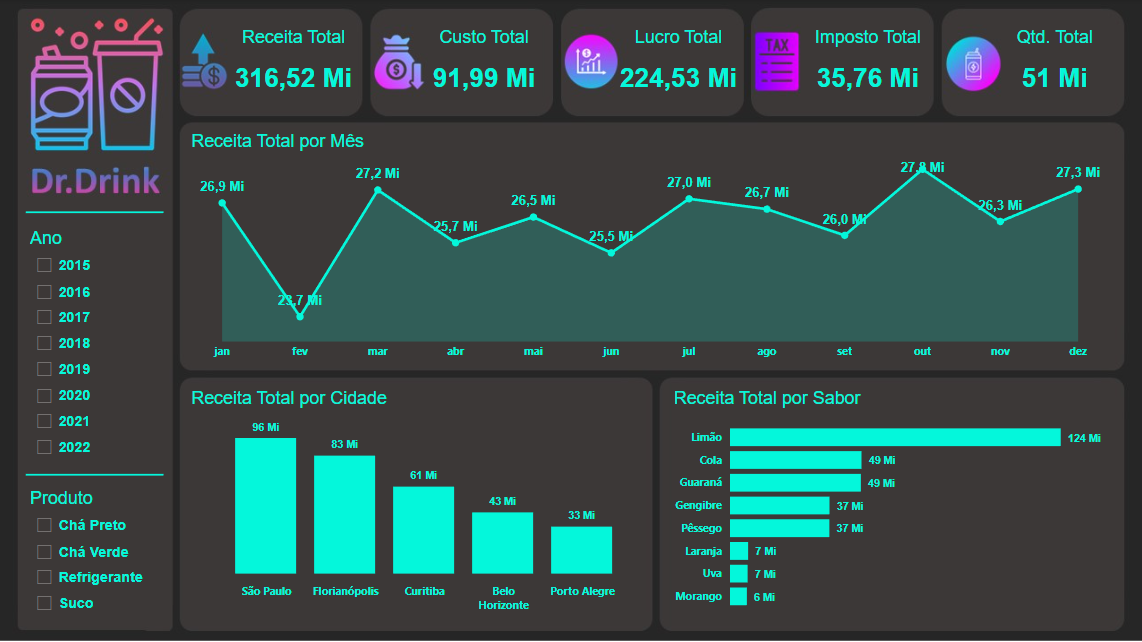

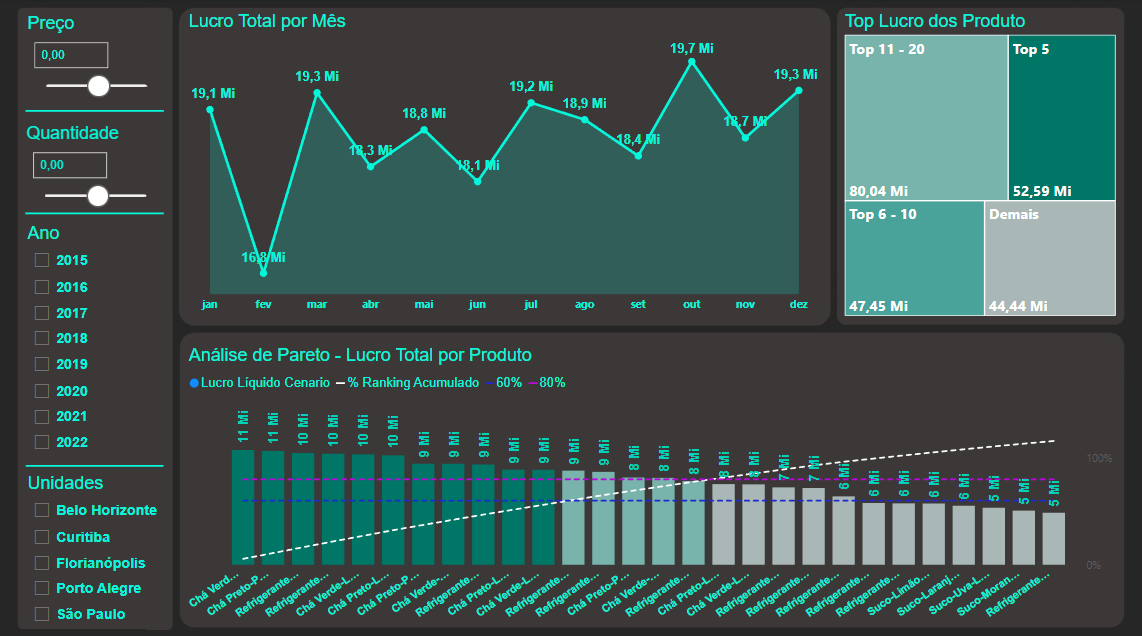

# Sugestões

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Em estudos futuros é interessante treinar algoritmos para identificar mais padrões de consumo que visem aumentar a receita da companhia e procurar estratégias de mercado para potencializar as vendas.

# Conclusão

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Por meio deste estudo foi possível saber a situação geral da nossa loja de bebidas, e analisar como os produtos vendidos impactam no lucro.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Além disso, observamos os produtos mais vendidos em categorias, o que nos permite montar estratégias de marketing para esses produtos, e para os produtos com menor potencial de vendas.